In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

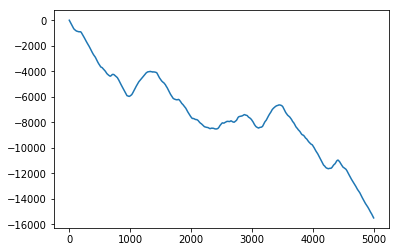

In [120]:
def random_run(T,k, v_max=0.01, start=None):
    X = np.zeros((T,k))
    v = np.random.randn(k)
    v = v/np.sqrt(np.sum(v**2.))*v_max
    a = np.zeros(k)

    X[0] = start if start is not None else 0.5*np.ones(k)



    for t in range(1,T):
        X[t] = X[t-1] + v
        for i in range(0,k):
#             if X[t, i] >= 1. or  X[t, i] <= 0.:
#                 v[i] = - v[i]
#                 a[i] = - a[i]

#             else:
                a = np.random.randn(k)*0.001

        a = np.clip(a, -0.001,0.001)
        v += a
        v = np.clip(v, -v_max,v_max)

#         np.clip(X[t], 0., 1., X[t])
    return X

rw = random_run(T=5001,k=1, start=0)*1000. 

v = rw[1:] - rw[:-1]

plt.plot(rw)

# Oscillatory models of place and grid cell firing

> Lengyel et al. (2003), _Dynamically detuned oscillations account for the coupled rate and temporal code of place cell firing_.

Below is an implementation of the dynamics in the appendix


In [127]:
v = v*1.3

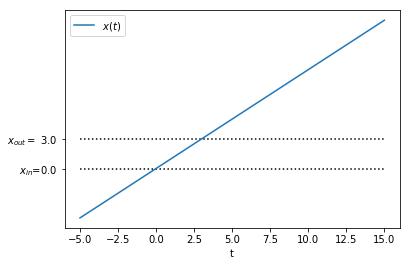

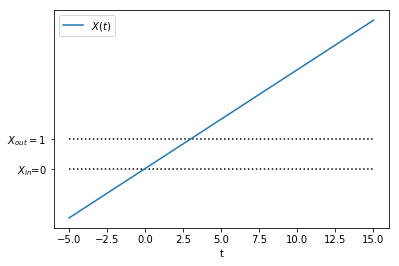

In [34]:
t0 = -5.
tL = 15.
L  = 1000
t  = np.linspace(t0,tL, num=L)
dt = (tL - t0)/len(t)



x_in  = 0.
x_out = 3.

v = np.ones(L)
# v[750:] = 0.
x = integrate(v)*dt + -5
X = (x - x_in)/x_out



plt.xlabel("t")
plt.plot(t, x, label="$x(t)$")
plt.hlines([x_in,x_out],t[0],t[-1], linestyle=":")

# plt.vlines([0.,x_out],t[0],t[-1], linestyle=":")

plt.yticks([x_in,x_out],["$x_{in}$=" + str(x_in), "$x_{out}=$ " + str(x_out)]);
plt.legend();
plt.show()
plt.xlabel("t")
plt.plot(t, X, label="$X(t)$")
plt.hlines([0.,1], t[0],t[-1], linestyle=":")

# plt.vlines([0.,x_out],t[0],t[-1], linestyle=":")

plt.yticks([0,1],["$X_{in}$=0", "$X_{out}=1$ " ]);
plt.legend();

In [36]:

k   = 1/x_out 
k_v = 1.
k_d = k/k_v

def integrate(I):
    M = np.tril(np.ones((len(I), len(I))))
    return np.dot(M,I)


def phi(f, phi_zero=0.):
    return phi_zero + 2.*np.pi*integrate(f)*dt


def rate_(A1, phi1, A2, phi2):
    r = A1 * np.cos(phi1) + A2*np.cos(phi2)
    r = r/(A1 + A2)
    return r

def rate(A1, phi1, A2, phi2):
    r = A1*np.cos(phi1) + A2*np.cos(phi2)
    r = r/(A1 + A2)
    return r*np.heaviside(r, 0)


def DI(v, X):
    return k_v*v*np.heaviside(X, 1.)*np.heaviside(1. - X,1.)





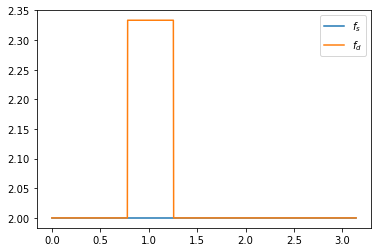

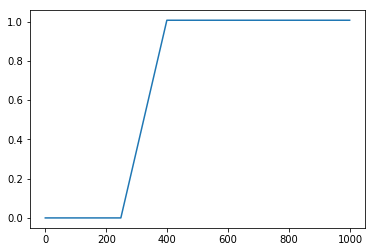

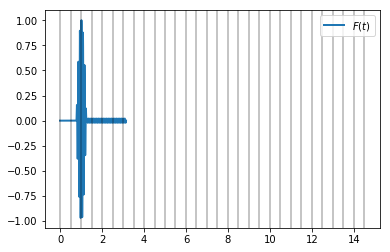

In [24]:


As = 1.
fs = np.ones(len(t))*2.


Ad = 1.
fd = k_d*DI(v, X) + fs
# fd = fs
# fd = k_d*DI(v, X) 


plt.plot(t,fs, label="$f_s$")
plt.plot(t,fd, label="$f_d$")
plt.legend();
plt.show()

plt.plot(integrate(k*DI(v, X))*dt)
plt.show()

phi_s = phi(fs, 0)
phi_d = phi(fd, np.pi)
# phi_d = phi(fd, 1.)
# phi_d  = 2*np.pi*X + phi_s + np.pi 

# phi_d = phi_s + np.pi*2*0.7
# phi_d = phi_d%(2*np.pi)


r  = rate( As, phi_s, Ad, phi_d) 
r_ = rate_(As, phi_s, Ad, phi_d)  


# plt.xlim(1,7)
plt.plot(t,r_, label="$F(t)$", linewidth=2)
# plt.plot(t,np.cos(phi_s), label="soma", c="black", alpha=0.1, linestyle="-")


for i in range(int(fs[0]*tL)):
    plt.axvline(x=i/fs[0], c="black", alpha=0.3, linestyle="-")
plt.legend();
plt.show()




0.003
0.7567567567567568
0.7807807807807807
0.8078078078078078
0.8318318318318318
0.8558558558558559
0.8798798798798799
0.9039039039039038
0.9309309309309309
0.954954954954955
0.978978978978979
0.0030030030030030463
0.027027027027026973
0.054054054054053946
0.0780780780780781
0.1021021021021021
0.12612612612612611
0.15015015015015015
0.17417417417417416
0.1981981981981982
0.22522522522522523


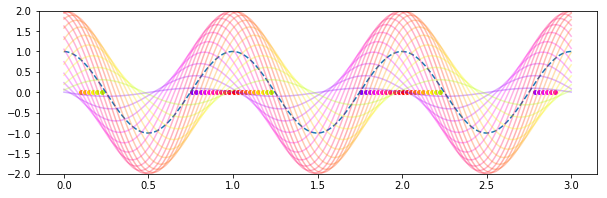

In [163]:
from scipy.signal import find_peaks_cwt
from matplotlib.cm import get_cmap

def find_peaks(f):
    peaks = find_peaks_cwt(f, np.ones(len(f))*5.)
    return peaks[1:-1], f[peaks][1:-1]

t = np.linspace(0.,3.,num=1000)


dt = t[-1]/1000.
print dt

def phi(f, phi_zero=0., dt=1.):
    return phi_zero + 2.*np.pi*integrate(f)*dt

fs = np.ones(len(t))
phi_s = phi(fs, 0, dt)

phi_d = phi(fs, np.pi + 4., dt)


cmap = get_cmap('hsv')



f, ax = plt.subplots(1,1, figsize=(10,3))


ps = []
ax.plot(t,np.cos(phi_s), label="Baseline $theta$", linestyle="--")
for offset in np.linspace(0.1, 2.*np.pi, num=20, endpoint=False):
    
    osc_1 = np.cos(phi(fs, 0., dt))
    osc_2 = np.cos(phi(fs, np.pi + offset, dt))
    ax.set_ylim(-2,2)

    

#     ax[1].set_ylim(-2,2)
#     ax[1].plot(t,np.cos(phi_s), label="Baseline $theta$", linestyle="--")
#     ax[1].plot(t,np.cos(phi_d) + np.cos(phi_s), label="Baseline $theta$")


    peaks, vals = find_peaks(osc_2 + osc_1)
    c = cmap(t[peaks][0]%1)
    print t[peaks][0]%1
    ps.append( t[peaks][0]%1)
    
    ax.plot(t,osc_2 + osc_1, alpha=0.3, c=c,  label=offset)
#     ax.legend()
    ax.scatter(t[peaks], np.zeros(len(vals)), edgecolor="white", c=c)



# peaks, vals = find_peaks(np.cos(phi_d) + np.cos(phi_s))
# plt.scatter(t[peaks], np.zeros(len(vals)), edgecolor="white")


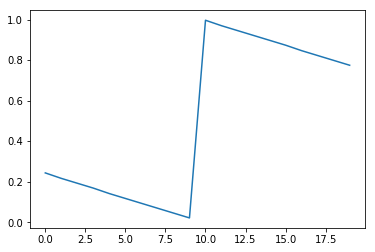

In [160]:
plt.plot(ps)